# INFO 1998 Final Project
#### Zack Hurwitz and Atreya Iyer

In [1]:
#imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
oly = pd.read_csv("athlete_events.csv")

In [45]:
winners = oly[oly["Medal"] != "No Medal"]
sport = "Swimming"
oly["Medal"] = oly["Medal"].fillna("No Medal")
oly = oly[oly["Sport"] == sport]
oly.head(100)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,No Medal
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,No Medal
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,No Medal
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
39,15,Arvo Ossian Aaltonen,M,34.0,NaN,NaN,Finland,FIN,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,No Medal
100,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Butterfly,No Medal
101,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 200 metres Butterfly,No Medal
102,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 4 x 100 metres Medley Relay,No Medal
103,36,Stefan Remco Aartsen,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,No Medal


In [4]:
oly_data = oly.drop(["ID", "Name", "Year", "NOC", "Games", "Season", "City"], axis=1).dropna()
oly_data.head()

,Sex,Age,Height,Weight,Team,Sport,Event,Medal
100,M,21.0,194.0,78.0,Netherlands,Swimming,Swimming Men's 100 metres Butterfly,No Medal
101,M,21.0,194.0,78.0,Netherlands,Swimming,Swimming Men's 200 metres Butterfly,No Medal
102,M,21.0,194.0,78.0,Netherlands,Swimming,Swimming Men's 4 x 100 metres Medley Relay,No Medal
103,M,25.0,194.0,78.0,Netherlands,Swimming,Swimming Men's 100 metres Butterfly,No Medal
104,M,25.0,194.0,78.0,Netherlands,Swimming,Swimming Men's 200 metres Butterfly,No Medal


In [5]:
cleanup_nums = {"Medal": {"No Medal": 0, "Gold": 1, "Silver": 1, "Bronze": 1}}
oly_data.replace(cleanup_nums, inplace = True)

In [6]:
vals = list(np.unique(oly_data['Team']))

In [7]:
teams=[]
for value in oly_data['Team']:
    t=vals.index(value)
    teams.append(t)
oly_data['Team']=teams

In [8]:
vals = list(np.unique(oly_data['Sport']))
sports = []
for value in oly_data['Sport']:
    s = vals.index(value)
    sports.append(s)
oly_data['Sport'] = sports

In [9]:
vals = ['M', 'F']
sex = []
for value in oly_data['Sex']:
    s = vals.index(value)
    sex.append(s)
oly_data['Sex'] = sex

In [10]:
vals = list(np.unique(oly_data['Event']))
events = []
for value in oly_data['Event']:
    e = vals.index(value)
    events.append(e)
oly_data['Event'] = events

In [11]:
oly_data.head()

,Sex,Age,Height,Weight,Team,Sport,Event,Medal
100,0,21.0,194.0,78.0,122,0,5,0
101,0,21.0,194.0,78.0,122,0,10,0
102,0,21.0,194.0,78.0,122,0,15,0
103,0,25.0,194.0,78.0,122,0,5,0
104,0,25.0,194.0,78.0,122,0,10,0


In [12]:
medals = oly_data["Medal"]

In [13]:
from collections import Counter
c = Counter(medals)
print(c)
inputs = oly_data.drop(["Medal"], axis=1)
total = sum([c[count] for count in c])
total_medals = total - c[0]
print("Guessing no medal: %f" % (1 - total_medals / total))

Counter({0: 16290, 1: 2486})
Guessing no medal: 0.867597


In [14]:
def predict(model, targets, inputs):
    x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)
    
    model.fit(x_train, y_train)
    model.predict(x_test)
    print("Score:", model.score(x_test, y_test))
    
    print("Cross-validation of values")
    print(cross_val_score(model, inputs, targets, cv=4, scoring="accuracy"))

In [15]:
dtc = DecisionTreeClassifier()
GRID = GridSearchCV(dtc,
                    param_grid={'max_depth': [5, 10, 20],
                                'max_leaf_nodes': [5, 10, 20, 50],
                                'min_samples_split': [5, 10, 20, 50]},
                    scoring='accuracy',
                    cv=2, n_jobs=-1)
GRID.fit(inputs, medals)
print('The parameters of the best model are: ')
print(GRID.best_params_)

The parameters of the best model are: 
{'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_split': 5}


In [16]:
dtc = DecisionTreeClassifier(max_depth=10, max_features=None, max_leaf_nodes=20,
                             min_samples_split=5)
predict(dtc, medals, inputs)

Score: 0.8982960596379127
Cross-validation of values
[0.90138445 0.8971246  0.89260601 0.89516301]


In [19]:
rfc=RandomForestClassifier(n_estimators = 500)
predict(rfc, medals, inputs)

Score: 0.904419595314164
Cross-validation of values
[0.90266241 0.89584665 0.89132751 0.89750693]


In [129]:
knn = KNeighborsClassifier()
GRID = GridSearchCV(knn,
                    param_grid={'n_neighbors': [2, 5, 10, 20],
                                'p': [1, 2, 3],
                                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                                'leaf_size': [10, 30, 50, 100]},
                    scoring='accuracy',
                    cv=2, n_jobs=-1)
GRID.fit(inputs, medals)
print('The parameters of the best model are: ')
print(GRID.best_params_)

KeyboardInterrupt: 

In [20]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=20, p=3)
predict(knn, medals, inputs)

Score: 0.8924387646432375
Cross-validation of values
[0.88881789 0.88178914 0.88450884 0.88280418]


In [ ]:
# svc = SVC()
# GRID = GridSearchCV(svc,
#                     param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#                                 'degree': [2, 3, 4, 5],
#                                 'C': [1.0, 0.5, 0.25, 1.25, 2]},
#                     scoring='accuracy',
#                     cv=2, n_jobs=-1)
# GRID.fit(inputs, medals)
# print('The parameters of the best model are: ')
# print(GRID.best_params_)

In [21]:
mlp = MLPClassifier()
GRID = GridSearchCV(mlp,
                    param_grid={"activation" : ['identity', 'logistic', 'tanh', 'relu'],
                                'solver': ['lbfgs', 'sgd', 'adam'],
                                'batch_size': [10, 200, 400, 100, 50]},
                    scoring='accuracy',
                    cv=2, n_jobs=-1)
GRID.fit(inputs, medals)
print('The parameters of the best model are: ')
print(GRID.best_params_)

/Users/atreyaiyer/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

In [22]:
mlp = MLPClassifier(activation = 'identity', batch_size = 200, solver = 'sgd')
predict(mlp, medals, inputs)

Score: 0.873269435569755
Cross-validation of values
[0.86773163 0.86730564 0.86788834 0.86554443]


/Users/atreyaiyer/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support 1 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/Users/atreyaiyer/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


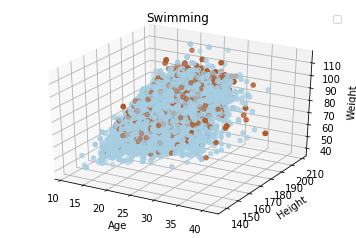

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(oly_data['Age'], oly_data['Height'], oly_data['Weight'], c=medals, cmap=plt.cm.Paired)

#colors = plt.cm.get_cmap('Paired')
#for medal in np.unique(medals):
#    ix = np.where(inputs[0] == medal)
#    ax.scatter(oly_data['Age'].loc[ix],oly_data['Height'].loc[ix],oly_data['Weight'], c = colors(medals), label = oly_data.target_names[medals])


ax.set_title(sport)
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.legend([1,0],['blue','brown'])

plt.show()


In [18]:
print(0.0328084*sum(oly_data['Height']) / len(oly_data['Height']))
print(2.20462*sum(oly_data['Weight']) / len(oly_data['Weight']))

6.04962292084
172.08884357


In [34]:
h=oly_data['Height'].values
w=oly_data['Weight'].values

oly_data['BMI'] = w/(h**2)

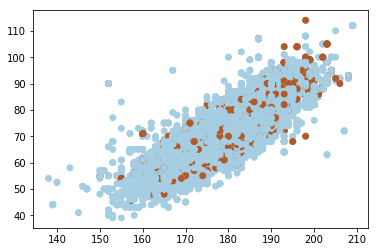

In [40]:
bmi = [w[i] / (h[i]**2) for i in range(len(oly_data['Weight']))]
plt.scatter(oly_data['Height'], oly_data['Weight'], c=medals, cmap=plt.cm.Paired)
plt.show()


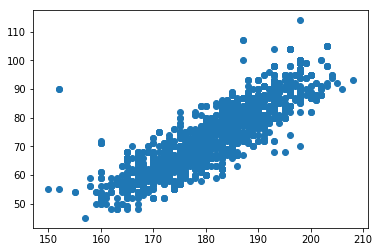

In [50]:
plt.scatter(winners['Height'], winners['Weight'], cmap=plt.cm.Paired)
plt.show()

In [46]:
winners.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
210,100,Oszkr Abay-Nemes,M,22.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Bronze
476,259,Reema Abdo,F,21.0,173.0,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze
740,424,Moira Abernethy (-Ford),F,17.0,NaN,NaN,South Africa,RSA,1956 Summer,1956,Summer,Melbourne,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
